In [1]:
import os
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
# point to most recent extract
extract = '../data/fullexports/2025-03-15'

In [3]:
# list top level directories with contents
for dr in os.listdir(extract):
    files = os.listdir(f'{extract}/{dr}')
    if len(files) > 0:
        print(f'Directory: {dr}')
        for fl in files:
            print(fl)
        print('\n')

Directory: customer_data
customer.json


Directory: DI_CONNECT
DI-ATP
DI-Connect-Aggregator
DI-Connect-Device
DI-Connect-Fitness
DI-Connect-Metrics
DI-Connect-Routing
DI-Connect-Uploaded-Files
DI-Connect-User
DI-Connect-Wellness
DI-GOLF


Directory: DI_CONNECT_IQ
DI-CONNECT_IQ


Directory: IT_CONSENT_HISTORY
consentHistory.json


Directory: IT_DEVICE_AND_CONTENT
devicesandcontent.json


Directory: IT_GLOBAL_EVENT
events.json


Directory: IT_ORDERS
orders.json




In [4]:
# go deeper
for dr in os.listdir(extract):
    subdir = f'{extract}/{dr}'
    files = [os.path.join(dp, f) for dp, dn, fn in os.walk(os.path.expanduser(subdir)) for f in fn]
    if len(files) > 0:
        print(f'Directory: {dr}')
        for fl in files:
            print(fl.replace(f'{subdir}\\', ''))

Directory: customer_data
customer.json
Directory: DI_CONNECT
DI-ATP\Garmin_Coach_Pause_History.json
DI-Connect-Aggregator\HydrationLogFile_2019-09-24_2020-01-02.json
DI-Connect-Aggregator\HydrationLogFile_2020-01-02_2020-04-11.json
DI-Connect-Aggregator\HydrationLogFile_2020-04-11_2020-07-20.json
DI-Connect-Aggregator\HydrationLogFile_2020-07-20_2020-10-28.json
DI-Connect-Aggregator\HydrationLogFile_2020-10-28_2021-02-05.json
DI-Connect-Aggregator\HydrationLogFile_2021-02-05_2021-05-16.json
DI-Connect-Aggregator\HydrationLogFile_2021-05-16_2021-08-24.json
DI-Connect-Aggregator\HydrationLogFile_2021-08-24_2021-12-02.json
DI-Connect-Aggregator\HydrationLogFile_2021-12-02_2022-03-12.json
DI-Connect-Aggregator\HydrationLogFile_2022-03-12_2022-06-20.json
DI-Connect-Aggregator\HydrationLogFile_2022-06-20_2022-09-28.json
DI-Connect-Aggregator\HydrationLogFile_2022-09-28_2023-01-06.json
DI-Connect-Aggregator\HydrationLogFile_2023-01-06_2023-04-16.json
DI-Connect-Aggregator\HydrationLogFile_202

In [5]:
# focus on DI-Connect:[DI-Connect-Metrics, DI-Connnect-Wellness] directories
for dr in os.listdir(f'{extract}/DI_Connect'):
    if dr not in ['DI-Connect-Metrics', 'DI-Connect-Wellness']:
        continue
        
    # shorthand for third level directory
    subdir = f'{extract}/DI_Connect/{dr}'
    
    # list files
    files = [os.path.join(dp, f) for dp, dn, fn in os.walk(os.path.expanduser(subdir)) for f in fn]
    
    # exclude backups
    files = [fl for fl in files if 'backup' not in fl.lower()]
    
    if len(files) > 0:
        print(f'Directory: {dr}')
        recordType = 'None'
        for fl in files:
            fl_s = fl.replace(f'{subdir}\\', '')
            idx = 0 if (dr == 'DI-Connect-Metrics') else -1
            if fl_s.split('_')[idx] != recordType:
                recordType = fl_s.split('_')[idx]
                print(f'Record Type: {recordType}')
                print(pd.read_json(fl).columns)
        print('\n')


Directory: DI-Connect-Metrics
Record Type: MetricsAcuteTrainingLoad
Index(['userProfilePK', 'calendarDate', 'deviceId', 'timestamp', 'acwrPercent',
       'acwrStatus', 'acwrStatusFeedback', 'dailyTrainingLoadAcute',
       'dailyTrainingLoadChronic', 'dailyAcuteChronicWorkloadRatio'],
      dtype='object')
Record Type: MetricsMaxMetData
Index(['userProfilePK', 'calendarDate', 'deviceId', 'updateTimestamp', 'sport',
       'subSport', 'vo2MaxValue', 'fitnessAge', 'fitnessAgeDescription',
       'analyzerMethod', 'maxMet', 'maxMetCategory', 'calibratedData'],
      dtype='object')
Record Type: RunRacePredictions
Index(['userProfilePK', 'calendarDate', 'deviceId', 'timestamp', 'raceTime5K',
       'raceTime10K', 'raceTimeHalf', 'raceTimeMarathon'],
      dtype='object')
Record Type: TrainingHistory
Index(['userProfilePK', 'calendarDate', 'deviceId', 'timestamp', 'sport',
       'subSport', 'trainingStatus', 'fitnessLevelTrend',
       'trainingStatus2FeedbackPhrase'],
      dtype='object

# Stack Like Files

In [6]:
# focus on DI-Connect directory
cmDir = f'{extract}/DI_Connect/DI-Connect-Metrics'
files = os.listdir(cmDir)
files = [fl for fl in files if 'backup' not in fl.lower()]

recordTypes = list(set([fl.split('_')[0] for fl in files]))

for rt in recordTypes:
    # stack
    temp = pd.concat([pd.read_json(f'{cmDir}/{fl}') for fl in os.listdir(cmDir) if fl.startswith(rt)], ignore_index = True)
    # rename
    exec(f'{rt} = temp')
    # export
    exec(f"{rt}.to_csv('../output/fullexports/2025-03-15/{rt}.csv', index = False)")
    
print(recordTypes)

['TrainingReadinessDTO', 'RunRacePredictions', 'TrainingHistory', 'MetricsMaxMetData', 'MetricsAcuteTrainingLoad']


In [7]:
# focus on DI-Wellness directory
cmDir = f'{extract}/DI_Connect/DI-Connect-Wellness'
files = os.listdir(cmDir)
files = [fl for fl in files if 'backup' not in fl.lower()]

recordTypes = list(set([fl.split('_')[-1] for fl in files]))

for rt in recordTypes:
    # stack
    temp = pd.concat([pd.read_json(f'{cmDir}/{fl}') for fl in os.listdir(cmDir) if fl.endswith(rt)], ignore_index = True)
    # rename
    dfn = rt.split('.')[0]
    exec(f'{dfn} = temp')
    # export
    exec(f"{dfn}.to_csv('../output/fullexports/2025-03-15/{dfn}.csv', index = False)")
    
print([rt.split('.')[0] for rt in recordTypes])

['fitnessAgeData', 'latest', 'powerZones', 'heartRateZones', 'sleepData', 'AbnormalHrEvents', 'userBioMetricProfileData', 'userBioMetrics']


# Acute Training Load

In [9]:
MetricsAcuteTrainingLoad

,userProfilePK,calendarDate,deviceId,timestamp,acwrPercent,acwrStatus,acwrStatusFeedback,dailyTrainingLoadAcute,dailyTrainingLoadChronic,dailyAcuteChronicWorkloadRatio
0,81197319,1696636800000,3461258174,2023-10-08 03:59:59,29,LOW,FEEDBACK_1,104,142,0.7
1,81197319,1696723200000,3461258174,2023-10-09 03:59:59,25,LOW,FEEDBACK_1,93,136,0.6
2,81197319,1696809600000,3461258174,2023-10-10 03:59:59,42,OPTIMAL,FEEDBACK_2,141,140,1.0
3,81197319,1696896000000,3461258174,2023-10-11 03:59:59,57,OPTIMAL,FEEDBACK_3,194,147,1.3
4,81197319,1696896000000,3461258174,2023-10-11 03:59:59,57,OPTIMAL,FEEDBACK_3,194,147,1.3
...,...,...,...,...,...,...,...,...,...,...
833,81197319,1741824000000,3461258174,2025-03-13 17:40:33,57,OPTIMAL,FEEDBACK_3,235,176,1.3
834,81197319,1741910400000,3461258174,2025-03-14 11:11:34,47,OPTIMAL,FEEDBACK_2,203,176,1.1
835,81197319,1741910400000,3461258174,2025-03-14 17:04:39,66,HIGH,FEEDBACK_4,281,176,1.5
836,81197319,1741996800000,3461258174,2025-03-15 11:03:48,57,OPTIMAL,FEEDBACK_3,241,176,1.3


# Max Metabolic

In [10]:
MetricsMaxMetData

,userProfilePK,calendarDate,deviceId,updateTimestamp,sport,subSport,vo2MaxValue,fitnessAge,fitnessAgeDescription,analyzerMethod,maxMet,maxMetCategory,calibratedData
0,81197319,2019-12-10,3317746948,2019-12-11T01:01:16.0,RUNNING,GENERIC,42,20.0,1.0,5.0,11.896194,GENERIC,1
1,81197319,2019-12-11,3317746948,2019-12-11T23:08:06.0,RUNNING,GENERIC,42,20.0,1.0,5.0,11.890259,GENERIC,1
2,81197319,2019-12-11,3317746948,2019-12-12T22:56:31.0,RUNNING,GENERIC,42,20.0,1.0,5.0,11.891068,GENERIC,1
3,81197319,2019-12-11,3317746948,2019-12-14T13:58:39.0,RUNNING,GENERIC,42,20.0,1.0,5.0,11.876236,GENERIC,1
4,81197319,2019-12-11,3317746948,2019-12-18T00:09:49.0,RUNNING,GENERIC,41,20.0,1.0,5.0,11.787292,GENERIC,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
678,81197319,2025-03-09,3461258174,2025-03-09T15:11:36.0,RUNNING,GENERIC,37,NaN,NaN,NaN,10.594345,GENERIC,1
679,81197319,2025-03-11,3461258174,2025-03-11T21:09:14.0,RUNNING,GENERIC,37,NaN,NaN,NaN,10.566162,GENERIC,1
680,81197319,2025-03-13,3461258174,2025-03-13T17:40:32.0,RUNNING,GENERIC,37,NaN,NaN,NaN,10.557999,GENERIC,1
681,81197319,2025-03-14,3461258174,2025-03-14T17:04:38.0,RUNNING,GENERIC,37,NaN,NaN,NaN,10.594330,GENERIC,1


# Race Predictions

In [11]:
RunRacePredictions['calendarDate'] = pd.to_datetime(RunRacePredictions['calendarDate'])

# create race time predictions in minutes
for tm in ['raceTime5K', 'raceTime10K', 'raceTimeHalf', 'raceTimeMarathon']:
    RunRacePredictions[f'{tm}Min'] = RunRacePredictions[tm] / 60
    
# create race pace predictions in minutes per mile
RunRacePredictions['pace5K'] = RunRacePredictions['raceTime5KMin'] / 3.1
RunRacePredictions['pace10K'] = RunRacePredictions['raceTime10KMin'] / 6.2
RunRacePredictions['paceHalf'] = RunRacePredictions['raceTimeHalfMin'] / 13.1
RunRacePredictions['paceMarathon'] = RunRacePredictions['raceTimeMarathonMin'] / 26.2

RunRacePredictions

,userProfilePK,calendarDate,deviceId,timestamp,raceTime5K,raceTime10K,raceTimeHalf,raceTimeMarathon,raceTime5KMin,raceTime10KMin,raceTimeHalfMin,raceTimeMarathonMin,pace5K,pace10K,paceHalf,paceMarathon
0,81197319,2023-10-07,3461258174,2023-10-08 03:59:59,2250,4922,11483,25482,37.500000,82.033333,191.383333,424.700000,12.096774,13.231183,14.609415,16.209924
1,81197319,2023-10-08,3461258174,2023-10-09 03:59:59,2250,4922,11483,25481,37.500000,82.033333,191.383333,424.683333,12.096774,13.231183,14.609415,16.209288
2,81197319,2023-10-09,3461258174,2023-10-10 03:59:59,2264,4955,11541,25604,37.733333,82.583333,192.350000,426.733333,12.172043,13.319892,14.683206,16.287532
3,81197319,2023-10-10,3461258174,2023-10-11 03:59:59,2269,4963,11552,25622,37.816667,82.716667,192.533333,427.033333,12.198925,13.341398,14.697201,16.298982
4,81197319,2023-10-10,3461258174,2023-10-11 03:59:59,2269,4963,11552,25622,37.816667,82.716667,192.533333,427.033333,12.198925,13.341398,14.697201,16.298982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1330,81197319,2025-03-14,3461258174,2025-03-14 11:11:34,2104,4547,10637,23884,35.066667,75.783333,177.283333,398.066667,11.311828,12.223118,13.533079,15.193384
1331,81197319,2025-03-14,3461258174,2025-03-14 17:04:39,2090,4522,10567,23745,34.833333,75.366667,176.116667,395.750000,11.236559,12.155914,13.444020,15.104962
1332,81197319,2025-03-15,3461258174,2025-03-15 04:03:13,2094,4527,10579,23773,34.900000,75.450000,176.316667,396.216667,11.258065,12.169355,13.459288,15.122774
1333,81197319,2025-03-15,3461258174,2025-03-15 11:03:48,2094,4527,10579,23773,34.900000,75.450000,176.316667,396.216667,11.258065,12.169355,13.459288,15.122774


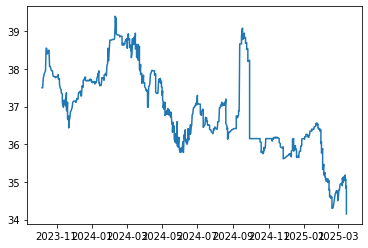

In [12]:
# plot predicted 5k time across history
plt.plot(RunRacePredictions['calendarDate'], RunRacePredictions['raceTime5KMin'])
plt.show()

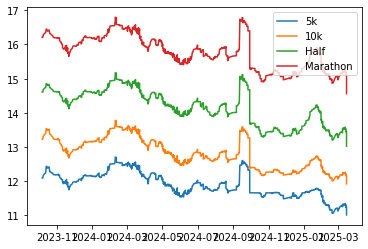

In [13]:
# compare evaluation of pace predictions
plt.plot(RunRacePredictions['calendarDate'], RunRacePredictions['pace5K'], label = '5k')
plt.plot(RunRacePredictions['calendarDate'], RunRacePredictions['pace10K'], label = '10k')
plt.plot(RunRacePredictions['calendarDate'], RunRacePredictions['paceHalf'], label = 'Half')
plt.plot(RunRacePredictions['calendarDate'], RunRacePredictions['paceMarathon'], label = 'Marathon')
plt.legend()
plt.show()

# Fitness Age

In [14]:
# create workable date
fitnessAgeData['asOf'] = pd.to_datetime(fitnessAgeData['asOfDateGmt'])

# average available vo2max metrics
fitnessAgeData['vo2max'] = fitnessAgeData[['vo2MaxForHealthyBmiFat', 'vo2MaxForHealthyActive', 'biometricVo2Max']].mean(axis = 1)

fitnessAgeData

,createTimestamp,asOfDateGmt,chronologicalAge,bmi,rhr,totalVigorousDays,totalVigorousIMs,numOfWeeksForIM,healthyBmi,healthyFat,...,vo2MaxForHealthyActive,biometricVo2Max,currentBioAge,healthyAllBioAge,healthyBmiFatBioAge,healthyActiveBioAge,weightDataLastEntryDate,rhrLastEntryDate,asOf,vo2max
0,2023-11-09T02:21:06.698,2023-11-08T00:00:00.0,34,31.787969,67,0,350,4,22.575540,23.650,...,34.729428,31.628426,35.969291,30.464596,32.340459,34.576562,2023-11-08,2023-11-08,2023-11-08,35.194951
1,2023-11-09T22:01:40.825,2023-11-09T00:00:00.0,34,31.787969,67,16,384,4,22.575540,23.650,...,34.729428,34.836878,34.526369,30.464596,31.123708,34.576562,2023-11-08,2023-11-09,2023-11-09,36.991830
2,2023-11-11T19:51:52.721,2023-11-11T00:00:00.0,34,31.787969,66,16,373,4,22.575540,23.650,...,34.729428,34.944329,34.476177,30.464596,31.123708,34.576562,2023-11-08,2023-11-11,2023-11-11,37.027647
3,2023-11-12T12:33:52.499,2023-11-12T00:00:00.0,34,31.787969,66,15,356,4,22.575540,23.650,...,34.729428,33.874844,34.975760,30.464596,31.123708,34.576562,2023-11-08,2023-11-12,2023-11-12,36.671152
4,2023-11-14T00:37:03.222,2023-11-13T00:00:00.0,34,31.659944,66,0,349,4,22.575540,23.650,...,34.825722,31.832170,35.879300,30.464596,32.340459,34.531581,2023-11-13,2023-11-13,2023-11-13,35.294964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2025-03-11T21:14:32.212,2025-03-11T00:00:00.0,35,31.604904,67,18,407,6,22.622302,23.875,...,34.730968,33.765909,35.948413,31.428430,32.093067,35.488267,2025-03-05,2025-03-11,2025-03-11,36.563481
361,2025-03-12T22:42:11.755,2025-03-12T00:00:00.0,35,31.604904,67,19,410,6,22.622302,23.875,...,34.730968,33.765909,35.948413,31.428430,32.093067,35.488267,2025-03-05,2025-03-12,2025-03-12,36.563481
362,2025-03-13T17:46:11.705,2025-03-13T00:00:00.0,35,31.604904,67,18,403,6,22.622302,23.875,...,34.730968,33.765909,35.948413,31.428430,32.093067,35.488267,2025-03-05,2025-03-13,2025-03-13,36.563481
363,2025-03-14T17:12:56.422,2025-03-14T00:00:00.0,35,31.604904,67,18,407,6,22.622302,23.875,...,34.730968,33.765909,35.948413,31.428430,32.093067,35.488267,2025-03-05,2025-03-14,2025-03-14,36.563481


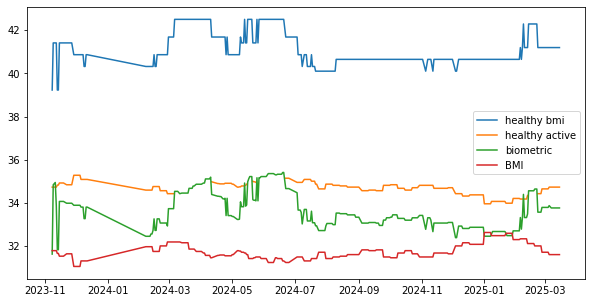

In [15]:
# plot vo2max metrics
fig, ax = plt.subplots(figsize = (10, 5))
ax.plot(fitnessAgeData['asOf'], fitnessAgeData['vo2MaxForHealthyBmiFat'], label = 'healthy bmi')
ax.plot(fitnessAgeData['asOf'], fitnessAgeData['vo2MaxForHealthyActive'], label = 'healthy active')
ax.plot(fitnessAgeData['asOf'], fitnessAgeData['biometricVo2Max'], label = 'biometric')
# ax.plot(fitnessAgeData['asOf'], fitnessAgeData['vo2max'], label = 'average')
ax.plot(fitnessAgeData['asOf'], fitnessAgeData['bmi'], label = 'BMI')
plt.legend()
plt.show()

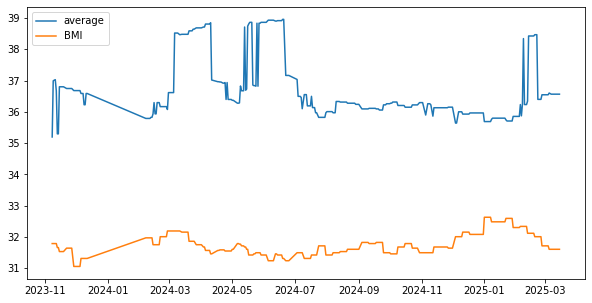

In [16]:
fig, ax = plt.subplots(figsize = (10, 5))
ax.plot(fitnessAgeData['asOf'], fitnessAgeData['vo2max'], label = 'average')
ax.plot(fitnessAgeData['asOf'], fitnessAgeData['bmi'], label = 'BMI')
plt.legend()
plt.show()

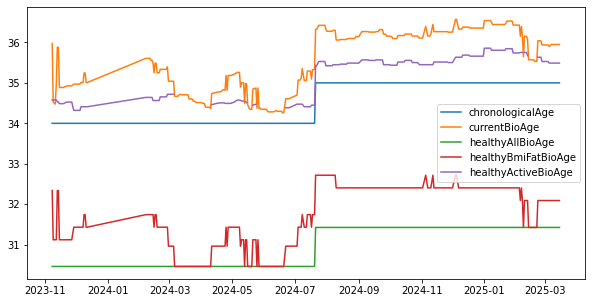

In [18]:
fig, ax = plt.subplots(figsize = (10, 5))
for age in ['chronologicalAge', 'currentBioAge', 'healthyAllBioAge', 'healthyBmiFatBioAge', 'healthyActiveBioAge']:
    plt.plot(fitnessAgeData['asOf'], fitnessAgeData[age], label = age)
    
plt.legend()
plt.show()

In [19]:
temp = fitnessAgeData[['chronologicalAge', 'currentBioAge', 'healthyAllBioAge', 'healthyBmiFatBioAge', 'healthyActiveBioAge']].reset_index(drop = True)
temp['ActiveImp'] = temp['currentBioAge'] - temp['healthyActiveBioAge']
temp['BMIImp'] = temp['currentBioAge'] - temp['healthyBmiFatBioAge']
temp['TotalImp'] = temp['currentBioAge'] - temp['healthyAllBioAge']

temp

,chronologicalAge,currentBioAge,healthyAllBioAge,healthyBmiFatBioAge,healthyActiveBioAge,ActiveImp,BMIImp,TotalImp
0,34,35.969291,30.464596,32.340459,34.576562,1.392729,3.628832,5.504695
1,34,34.526369,30.464596,31.123708,34.576562,-0.050193,3.402661,4.061773
2,34,34.476177,30.464596,31.123708,34.576562,-0.100386,3.352469,4.011580
3,34,34.975760,30.464596,31.123708,34.576562,0.399198,3.852052,4.511164
4,34,35.879300,30.464596,32.340459,34.531581,1.347719,3.538841,5.414704
...,...,...,...,...,...,...,...,...
360,35,35.948413,31.428430,32.093067,35.488267,0.460146,3.855346,4.519983
361,35,35.948413,31.428430,32.093067,35.488267,0.460146,3.855346,4.519983
362,35,35.948413,31.428430,32.093067,35.488267,0.460146,3.855346,4.519983
363,35,35.948413,31.428430,32.093067,35.488267,0.460146,3.855346,4.519983


In [22]:
temp[['ActiveImp', 'BMIImp']].sum(axis = 1)# - temp['TotalImp']

0      5.021561
1      3.352469
2      3.252083
3      4.251249
4      4.886560
         ...   
360    4.315492
361    4.315492
362    4.315492
363    4.315492
364    4.315492
Length: 365, dtype: float64

# Sleep

In [23]:
sleepData

,sleepStartTimestampGMT,sleepEndTimestampGMT,calendarDate,sleepWindowConfirmationType,retro,deepSleepSeconds,lightSleepSeconds,awakeSleepSeconds,unmeasurableSeconds,averageRespiration,lowestRespiration,highestRespiration,remSleepSeconds,awakeCount,avgSleepStress,sleepScores,restlessMomentCount,napList,spo2SleepSummary
0,2019-12-09T03:45:00.0,2019-12-09T11:45:00.0,2019-12-09,UNCONFIRMED,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-12-10T06:03:00.0,2019-12-10T15:39:00.0,2019-12-10,AUTO_CONFIRMED_FINAL,False,21720.0,11820.0,1020.0,0.0,15.0,6.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-12-11T03:45:00.0,2019-12-11T11:45:00.0,2019-12-11,UNCONFIRMED,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-12-12T03:45:00.0,2019-12-12T11:45:00.0,2019-12-12,UNCONFIRMED,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-12-13T03:45:00.0,2019-12-13T11:45:00.0,2019-12-13,UNCONFIRMED,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1900,2025-03-12T03:07:15.0,2025-03-12T10:49:15.0,2025-03-12,ENHANCED_CONFIRMED_FINAL,False,4620.0,19140.0,600.0,0.0,18.0,12.0,24.0,3360.0,1.0,24.420000,"{'overallScore': 77, 'qualityScore': 75, 'dura...",35.0,NaN,"{'userProfilePk': 81197319, 'deviceId': 346125..."
1901,2025-03-13T02:31:22.0,2025-03-13T10:59:22.0,2025-03-13,ENHANCED_CONFIRMED_FINAL,False,3540.0,23040.0,1080.0,0.0,18.0,12.0,24.0,2820.0,1.0,20.750000,"{'overallScore': 76, 'qualityScore': 72, 'dura...",46.0,NaN,NaN
1902,2025-03-14T03:22:33.0,2025-03-14T11:05:33.0,2025-03-14,ENHANCED_CONFIRMED_FINAL,False,3840.0,19260.0,420.0,0.0,18.0,9.0,24.0,4260.0,0.0,21.709999,"{'overallScore': 81, 'qualityScore': 79, 'dura...",35.0,NaN,NaN
1903,2025-03-15T02:36:39.0,2025-03-15T10:37:39.0,2025-03-15,ENHANCED_CONFIRMED_FINAL,False,5160.0,16800.0,720.0,0.0,18.0,8.0,24.0,6180.0,1.0,21.580000,"{'overallScore': 85, 'qualityScore': 82, 'dura...",34.0,NaN,NaN


In [24]:
sleepData['napList'].drop_duplicates()

0                                                     NaN
1438    [{'napTimeSec': 1860, 'napStartTimestampGMT': ...
1443    [{'napTimeSec': 1440, 'napStartTimestampGMT': ...
1444    [{'napTimeSec': 1440, 'napStartTimestampGMT': ...
1445    [{'napTimeSec': 1980, 'napStartTimestampGMT': ...
                              ...                        
1872    [{'napTimeSec': 780, 'napStartTimestampGMT': '...
1876    [{'napTimeSec': 3960, 'napStartTimestampGMT': ...
1883    [{'napTimeSec': 2580, 'napStartTimestampGMT': ...
1888    [{'napTimeSec': 3720, 'napStartTimestampGMT': ...
1890    [{'napTimeSec': 4020, 'napStartTimestampGMT': ...
Name: napList, Length: 145, dtype: object

# Latest

In [25]:
latest

,lactateThresholdSpeed,lactateThresholdHeartRate
0,0.247222,189


# User BioMetric Profile

In [30]:
userBioMetricProfileData

,height,weight,vo2Max,lactateThresholdHeartRate,functionalThresholdPower
0,157.479996,78380,37,189,285


# Power Zones

In [33]:
powerZones

,sport,functionalThresholdPower,zone1Floor,zone2Floor,zone3Floor,zone4Floor,zone5Floor,zone6Floor,zone7Floor
0,RUNNING,285,185,228,256,285,328,0,0


# Abnormal HR Events

In [34]:
AbnormalHrEvents

,deviceId,abnormalHrEventGMT,abnormalHrThresholdValue,abnormalHrValue,calendarDate
0,3317746948,2022-02-27T01:25:00.0,100,100,2022-02-26
1,3317746948,2022-02-27T01:35:00.0,100,106,2022-02-26
2,3317746948,2022-02-27T01:45:00.0,100,104,2022-02-26
3,3317746948,2022-02-27T01:55:00.0,100,104,2022-02-26
4,3317746948,2022-02-27T02:56:00.0,100,100,2022-02-26
5,3317746948,2022-03-02T17:28:00.0,100,105,2022-03-02
6,3317746948,2022-03-02T18:11:00.0,100,102,2022-03-02
7,3317746948,2022-03-06T00:28:00.0,100,100,2022-03-05
8,3317746948,2022-03-08T02:24:00.0,100,104,2022-03-07
9,3317746948,2022-03-10T03:31:00.0,100,107,2022-03-09


# User Bio

In [27]:
userBioMetrics

,version,metaData,userSetNullForHeight,userSetNullForWeight,userSetNullForActivityClass,userSetNullForLactateThresholdSpeed,userSetNullForLactateThresholdHR,userSetNullForVO2MaxCycling,userSetNullForVO2MaxRunning,height,weight,vo2MaxRunning,ftpAutoDetected,functionalThresholdPower,sportId,lactateThresholdSpeed,lactateThresholdHearRate,firstbeatRunningLtTimestamp,thresholdHeartRateAutoDetected
0,1575945757693,"{'userProfilePK': 81197319, 'calendarDate': '2...",True,True,True,True,True,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1575945857514,"{'userProfilePK': 81197319, 'calendarDate': '2...",False,False,False,False,False,False,False,157.479996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1575945876616,"{'userProfilePK': 81197319, 'calendarDate': '2...",False,False,False,False,False,False,False,157.479996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1575945876622,"{'userProfilePK': 81197319, 'calendarDate': '2...",False,False,False,False,False,False,False,NaN,"{'weight': 58967.0, 'sourceType': 'USER_SETTIN...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1575945889686,"{'userProfilePK': 81197319, 'calendarDate': '2...",False,False,False,False,False,False,False,157.479996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
781,1741533479331,"{'userProfilePK': 81197319, 'calendarDate': '2...",False,False,False,False,False,False,False,NaN,NaN,37.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
782,1741727560944,"{'userProfilePK': 81197319, 'calendarDate': '2...",False,False,False,False,False,False,False,NaN,NaN,37.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
783,1741887974005,"{'userProfilePK': 81197319, 'calendarDate': '2...",False,False,False,False,False,False,False,NaN,NaN,37.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
784,1741972164229,"{'userProfilePK': 81197319, 'calendarDate': '2...",False,False,False,False,False,False,False,NaN,NaN,37.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Heart Rate Zones

In [32]:
heartRateZones

,trainingMethod,restingHeartRateUsed,lactateThresholdHeartRateUsed,zone1Floor,zone2Floor,zone3Floor,zone4Floor,zone5Floor,maxHeartRateUsed,restingHrAutoUpdateUsed,sport,changeState
0,HR_MAX,82,189,106,127,148,170,191,212,False,DEFAULT,UNCHANGED
